### Scaling Preprocessing Task

표정 분류 <br>
`flow_from_dataframe()`을 사용한다.

## 함수 선언

In [41]:
def preprocessing_scaling(image, mode='tf'):
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

In [42]:
def show_pixel_histogram(image):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    titles = ['Red', 'Green', 'Blue']
    for i in range(3):
        axs[i].hist(image[:, :, i].flatten(), bins=100, alpha=0.5)
        title_str = titles[i]
        axs[i].set(title=title_str)

## Train, Validation

In [21]:
root = './datasets/face/original/'

directories = glob(os.path.join(root, '*'))
directory_names = []
for directory in directories:
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [22]:
root = './datasets/face/original/'

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.png')

        os.rename(old_file, new_file)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size=(150, 150), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 28709 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [24]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [25]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [26]:
import pandas as pd

face_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
face_df.file_paths = face_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
face_df

,file_paths,target_names,targets
0,./datasets/face/original/angry/angry1.png,angry,0
1,./datasets/face/original/angry/angry10.png,angry,0
2,./datasets/face/original/angry/angry100.png,angry,0
3,./datasets/face/original/angry/angry1000.png,angry,0
4,./datasets/face/original/angry/angry1001.png,angry,0
...,...,...,...
28704,./datasets/face/original/surprise/surprise995.png,surprise,6
28705,./datasets/face/original/surprise/surprise996.png,surprise,6
28706,./datasets/face/original/surprise/surprise997.png,surprise,6
28707,./datasets/face/original/surprise/surprise998.png,surprise,6


In [30]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = \
train_test_split(face_df.file_paths, 
                 face_df.targets, 
                 stratify=face_df.targets, 
                 test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(test_targets.value_counts())

targets
3    5772
4    3972
5    3864
2    3277
0    3196
6    2537
1     349
Name: count, dtype: int64
targets
3    1443
4     993
5     966
2     820
0     799
6     634
1      87
Name: count, dtype: int64


In [31]:
train_df = face_df.iloc[train_images.index].reset_index(drop=True)
validation_df = face_df.iloc[validation_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)

(22967, 3)
(5742, 3)


## Test

In [32]:
root = './datasets/face/test/'

directories = glob(os.path.join(root, '*'))
directory_names = []
for directory in directories:
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [33]:
root = './datasets/face/test/'

for name in directory_names:
    for i, file_name in enumerate(os.listdir(os.path.join(root, name))):
        old_file = os.path.join(root + name + '/', file_name)
        new_file = os.path.join(root + name + '/', name + str(i + 1) + '.png')

        os.rename(old_file, new_file)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size=(150, 150), batch_size=32, class_mode='categorical')
print(generator.class_indices)

Found 7178 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [35]:
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [36]:
target_names = []
for target in generator.classes:
    target_names.append(target_name[target])

In [37]:
import pandas as pd

test_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names, 'targets': generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))
test_df

,file_paths,target_names,targets
0,./datasets/face/test/angry/angry1.png,angry,0
1,./datasets/face/test/angry/angry10.png,angry,0
2,./datasets/face/test/angry/angry100.png,angry,0
3,./datasets/face/test/angry/angry101.png,angry,0
4,./datasets/face/test/angry/angry102.png,angry,0
...,...,...,...
7173,./datasets/face/test/surprise/surprise95.png,surprise,6
7174,./datasets/face/test/surprise/surprise96.png,surprise,6
7175,./datasets/face/test/surprise/surprise97.png,surprise,6
7176,./datasets/face/test/surprise/surprise98.png,surprise,6


## 사진 출력

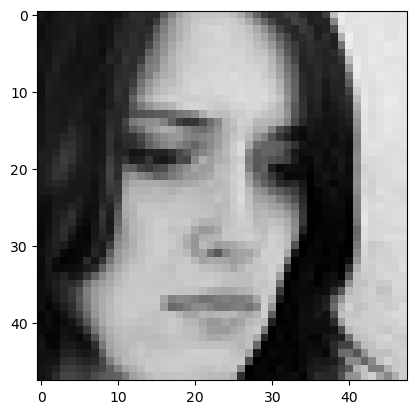

In [38]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[16749]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

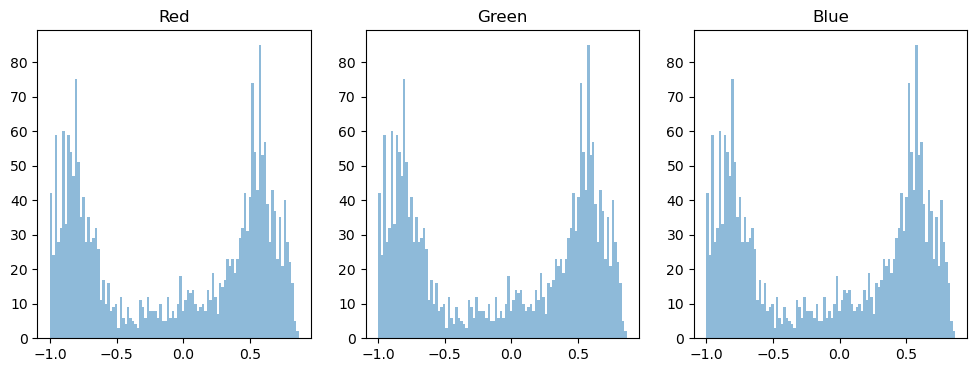

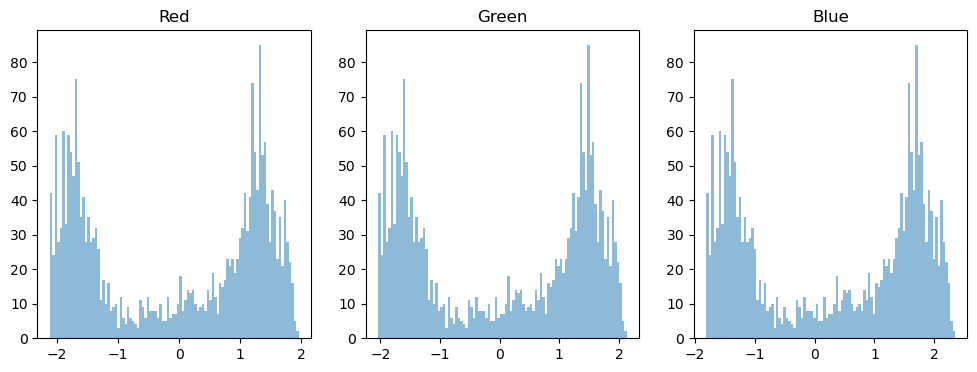

In [43]:
scaled_image_tf = preprocessing_scaling(image, mode='tf')
scaled_image_torch = preprocessing_scaling(image, mode='torch')

show_pixel_histogram(scaled_image_tf)
show_pixel_histogram(scaled_image_torch)

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import albumentations as A

IMAGE_SIZE = 150
BATCH_SIZE = 64

def preprocessing_scaling_for_train(image, mode='tf'):
    aug = A.HorizontalFlip(p=0.5)
    image = aug(image=image)['image']
    
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

def preprocessing_scaling(image, mode='tf'):
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

train_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling_for_train)
validation_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)
test_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical')

test_flow = test_generator.flow_from_dataframe(dataframe=test_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical')

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 22967 validated image filenames belonging to 7 classes.
Found 5742 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(7, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [46]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 67s 1us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 150, 150, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 74, 74, 32)        │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 74, 74, 32)        │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 74, 74, 32)        │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 72, 72, 64)        │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 72, 72, 64)        │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 72, 72, 64)        │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 72, 72, 128)       │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 72, 72, 128)       │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 72, 72, 128)       │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 72, 72, 128)       │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 72, 72, 128)       │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 36, 36, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 36, 36, 128)       │               

 Total params: 20,964,287 (79.97 MB)

 Trainable params: 20,909,759 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [48]:
import gc

gc.collect()

50196

In [49]:
N_EPOCHS = 10

history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


718/718 ━━━━━━━━━━━━━━━━━━━━ 1314s 2s/step - acc: 0.4038 - loss: 1.5711 - val_acc: 0.4963 - val_loss: 1.3854 - learning_rate: 0.0010
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1294s 2s/step - acc: 0.5636 - loss: 1.2067 - val_acc: 0.5538 - val_loss: 1.2278 - learning_rate: 0.0010
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1304s 2s/step - acc: 0.5969 - loss: 1.1238 - val_acc: 0.5960 - val_loss: 1.0936 - learning_rate: 0.0010
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1342s 2s/step - acc: 0.6168 - loss: 1.0632 - val_acc: 0.6156 - val_loss: 1.0664 - learning_rate: 0.0010
Epoch 5/10
401/718 ━━━━━━━━━━━━━━━━━━━━ 10:42 2s/step - acc: 0.6440 - loss: 0.9998

KeyboardInterrupt: 

In [50]:
model.evaluate(test_flow)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - acc: 0.5973 - loss: 1.1119


[1.1051599979400635, 0.5951518416404724]

In [51]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

NameError: name 'history' is not defined